<a href="https://colab.research.google.com/github/fergogu27-ctrl/EDPII/blob/main/M%C3%A9todo_de_Colocacion_para_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método de Colocación para EDO**

Queremos resolver la ecuación
$$\frac{\ d^2 u}{\ dx^2 } + u =  -x$$

sujeta a las condiciones $$u(0)=0 \ \ u'(0)=2$$

Analíticamente:

In [1]:
import sympy as sp    #Calculo simbolico
import numpy as np    #Hace arreglo, nos ayuda a dar datos para la grafica

import matplotlib.pyplot as plt

In [2]:
x = sp.symbols('x')     #x es una variable
u = sp.Function('u')    #u es una función, todavia no esta indicado de quien esta en función , puedo indicar que sea función de x.

In [3]:
x   #Observamos como x=x(variable)

x

Para resolver la ecuación podemos aproximar la solución de forma que esta definida "ode" el cual calculamos la segunda derivada  respecto de x, podemos decir que lo hacemos atraves de calcular el error

In [4]:
ode = sp.Eq(u(x).diff(x, 2)+ u(x) ,x )    #Definimos la función, inidicamos que u es función de x, calcula la derivada 2 respecto de x(diff) , suma la misma función y por ultimo sumamos x
sp.dsolve(ode,u(x))                 #Resuelve la función, indicando cual es la función

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

Teniendo la solución general ahora calculamos la solución con las condiciones dadas en el problema.

In [5]:
sol = sp.dsolve(ode, ics={u(0): 0, sp.diff(u(x),x).subs(x,0): 2} )   #(ics)Es una estructura de diccionario (llave, valor ).  Introducimos los valores de la condición inicial

In [6]:
sol

Eq(u(x), x + sin(x))

Obtenemos la grafica de la solución

<>:11: SyntaxWarning: invalid escape sequence '\;'
<>:11: SyntaxWarning: invalid escape sequence '\;'
/tmp/ipython-input-1914542763.py:11: SyntaxWarning: invalid escape sequence '\;'
  plt.title('Solución del problema de control \n$u\'\'+u=x,\; u(0)=0, \; u\'(0)=2$')


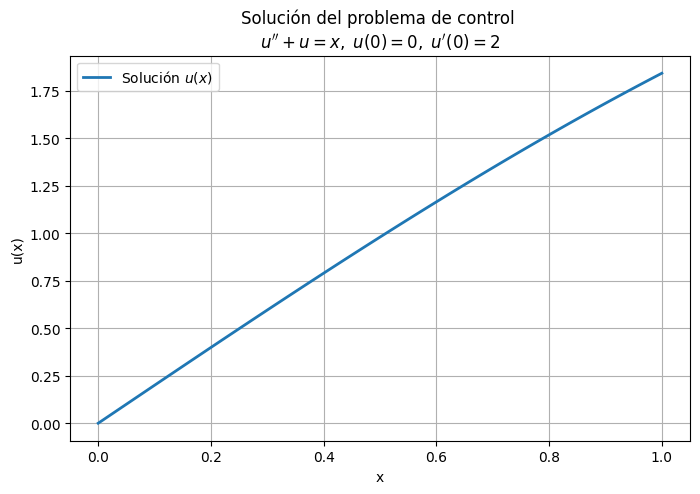

In [7]:
u_expr = sol.rhs      #Convertimos en un arreglo

u_num=sp.lambdify(x, u_expr, "numpy")


xx=np.linspace(0,1,100)
yy=u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy,  label='Solución $u(x)$', linewidth=2)
plt.title('Solución del problema de control \n$u\'\'+u=x,\; u(0)=0, \; u\'(0)=2$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

Ahora vamos a calcular las dos funciones base como en la clase donde teniamos la ecuación $$U_n=\alpha_1*x(1-x)+\alpha_2*x^2(1-x)$$ Para obtener la solución exacta determinamos E=0.
Como observación con mayor terminos tenga nuestra expresión el error va hacer menor.

En la clase tomamos lo anterior como prueba , con el ejercicio correspondiente. Tomamos la ecuación $$U_n=\alpha_0+\alpha_1x+\alpha_2*x^2+\alpha_3*x^3+...$$

In [8]:
a, b, c, d = sp.symbols('a b c d')  #Aqui a, b, c, y d toman mis valores de alfa

#Funcion de prueba u_n(x) que cumple u(0)=0 u'(0)=2

u_n= a+ b*x + c*x**2 + d*x**3       #Polinomio del ejercicio Se puede poner u_2, como definimos en clase

In [9]:
u_n

a + b*x + c*x**2 + d*x**3

Ya que tenemos nuestra ecuación definida ahora calculamos la difernciales en las condiocnes iniciales

In [10]:
ec_ci1 = sp.Eq(u_n.subs(x, 0), 0)               #u_n(0)=0
ec_ci2 = sp.Eq(sp.diff(u_n, x).subs(x, 0), 2)   #u_n'(0)=0 Son nuestras condiciones

In [11]:
sol_1 = sp.solve([ec_ci1, ec_ci2], [a, b])   #Nuestra solución
a_sol, b_sol = sol_1[a], sol_1[b]

In [12]:
u_n = u_n.subs({a: a_sol, b: b_sol})

**Ejercicio 1** Elegir $$\alpha_0 \ y \ \alpha_1 $$ que satisfacen las condiciones iniciales.

In [13]:
print("\n Coeficientes que satisfacen las condiciones iniciales:")
print(f"a = {a_sol},b= {b_sol}")
print("u_n(x) =", u_n)


 Coeficientes que satisfacen las condiciones iniciales:
a = 0,b= 2
u_n(x) = c*x**2 + d*x**3 + 2*x


**Ejercicio 2** Ahora en nuestro ejercicio nos pide que definamos $$\epsilon=u_n''+u_n-x$$ y encontremos a $$\epsilon$$ en este caso

In [14]:
u_n_2 = sp.diff(u_n, x, 2)  #Es la segunda derivada de la funcion u_n respecto de x cuantas veces 2

F = u_n_2 + u_n - x

In [15]:
F

c*x**2 + d*x**3 + x + 2*(c + 3*d*x)

In [16]:
eqs=sp.simplify(u_n_2 + u_n -x)

Podemos observar que es eps es lo mismo que cuando definimos F que es el error , se puede utilizar ambas expresiones.

In [17]:
print("\n ε(x) = u_N'' + u_N - x =")
sp.pprint(eqs)


 ε(x) = u_N'' + u_N - x =
   2            3            
c⋅x  + 2⋅c + d⋅x  + 6⋅d⋅x + x


In [18]:
#Puntos de colocación

points = [sp.Rational(1,2), sp.Integer(1) ]# Rational sirve para poner la fracción y Interger para valores enteros

In [19]:
points

[1/2, 1]

In [20]:
eqs= [sp.Eq(F.subs(x, p), 0 ) for p in points]
#Resolver para a y b

Obtenemos nuestro sistema de ecuaciones para poder obtener la solución, donde nos quedan las alpha $$c=\alpha_2 \ y \ d=\alpha_3 $$

In [21]:
for eq in eqs:
    print(eq)

Eq(9*c/4 + 25*d/8 + 1/2, 0)
Eq(3*c + 7*d + 1, 0)


In [22]:
print("Sistema de ecuaciones simbolico:")
for eq in eqs:
  sp.pprint(eq)

Sistema de ecuaciones simbolico:
9⋅c   25⋅d   1    
─── + ──── + ─ = 0
 4     8     2    
3⋅c + 7⋅d + 1 = 0


In [23]:
sol_2=sp.solve(eqs, [c,d])    #Se calcula la sol para determinar valor de c y d
print("\nSolución del sistema (c, d):",sol_2)


Solución del sistema (c, d): {c: -1/17, d: -2/17}


Teniendo los valores de c y d los sustituimos en nuestra solución anterior y  la covertimos en un arreglo para poder graficarla.

In [24]:
#sustituir en la funcion de prueba
u_approx = u_n.subs(sol_2)
u_approx_num = sp.lambdify(x, u_approx, "numpy")

Es nuestra aproximación cubica

In [25]:
u_approx

-2*x**3/17 - x**2/17 + 2*x

In [26]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

Podemos observar que nuestra aproximación por el método de colocación tiene una aproximación muy cercana a nuestra solución exacta esto nos indica que cada vez el método se aproxima mucho mas que los anteriores metodos , teniendo un error muy pequeño.

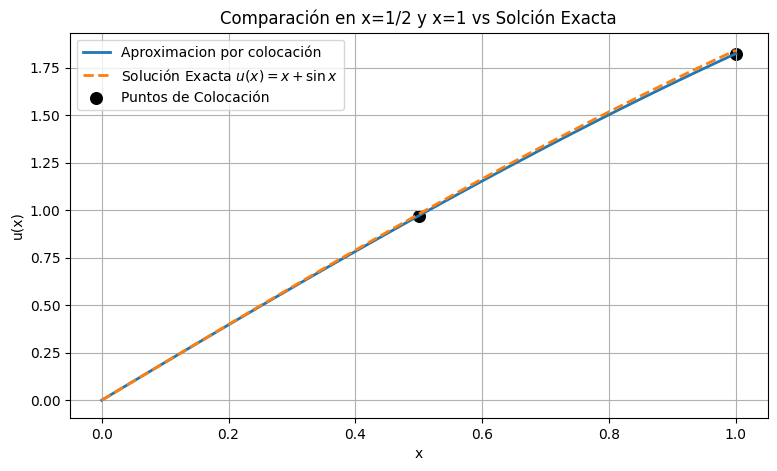

In [27]:
#Solución analitica y numerica
xx = np.linspace(0,1,100)


plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label='Aproximacion por colocación', linewidth=2)
plt.plot(xx, yy, '--', label=f'Solución Exacta $u(x)=x+\\sin x$',linewidth=2)

#Puntos de colocación
plt.scatter([0.5,1.0], u_approx_fn(np.array([0.5,1.0])),
            color='black', s=70, label='Puntos de Colocación')

plt.title('Comparación en x=1/2 y x=1 vs Solción Exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

Ahora calculamos el error de la aproximación numérica

[0.00000000e+00 5.95126930e-06 2.36030213e-05 5.26522669e-05
 9.27962271e-05 1.43732438e-04 2.05158858e-04 2.76773968e-04
 3.58276882e-04 4.49367448e-04 5.49746354e-04 6.59115236e-04
 7.77176777e-04 9.03634813e-04 1.03819444e-03 1.18056213e-03
 1.33044579e-03 1.48755493e-03 1.65160072e-03 1.82229611e-03
 1.99935594e-03 2.18249703e-03 2.37143828e-03 2.56590080e-03
 2.76560799e-03 2.97028562e-03 3.17966200e-03 3.39346802e-03
 3.61143726e-03 3.83330613e-03 4.05881393e-03 4.28770298e-03
 4.51971867e-03 4.75460965e-03 4.99212783e-03 5.23202856e-03
 5.47407067e-03 5.71801661e-03 5.96363252e-03 6.21068836e-03
 6.45895796e-03 6.70821918e-03 6.95825394e-03 7.20884837e-03
 7.45979288e-03 7.71088226e-03 7.96191577e-03 8.21269724e-03
 8.46303519e-03 8.71274286e-03 8.96163837e-03 9.20954477e-03
 9.45629016e-03 9.70170776e-03 9.94563601e-03 1.01879187e-02
 1.04284049e-02 1.06669492e-02 1.09034121e-02 1.11376592e-02
 1.13695623e-02 1.15989988e-02 1.18258522e-02 1.20500118e-02
 1.22713734e-02 1.248983

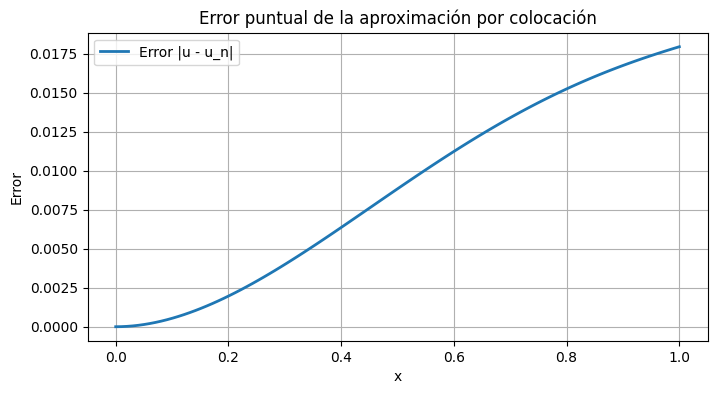

In [28]:
# Error aprox
error = u_num(xx) - u_approx_fn(xx)
error_abs = np.abs(error)
print(error_abs)


# Gráfica del error aprox
plt.figure(figsize=(8,4))
plt.plot(xx, error, label="Error |u - u_n|", linewidth=2)
plt.title("Error puntual de la aproximación por colocación")
plt.xlabel("x")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.show()
